# Pandas Fundamentals

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

(Data are from the NASA [Planetary Fact Sheet](https://nssdc.gsfc.nasa.gov/planetary/factsheet/).)

In [2]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]
masses = pd.Series(values, index=names)
masses

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

Series have built in plotting methods.

<Axes: >

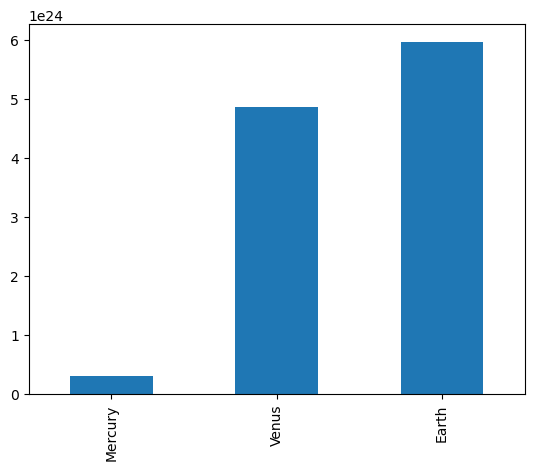

In [3]:
masses.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [4]:
np.log(masses) / masses**2

Mercury    6.006452e-46
Venus      2.396820e-48
Earth      1.600655e-48
dtype: float64

We can access the underlying index object if we need to:

In [5]:
masses.index

Index(['Mercury', 'Venus', 'Earth'], dtype='object')

### Indexing

We can get values back out using the index via the `.loc` attribute

In [6]:
masses.loc['Earth']

np.float64(5.97e+24)

Or by raw position using `.iloc`

In [7]:
masses.iloc[2]

np.float64(5.97e+24)

We can pass a list or array to loc to get multiple rows back:

In [8]:
masses.loc[['Venus', 'Earth']]

Venus    4.870000e+24
Earth    5.970000e+24
dtype: float64

And we can even use slice notation

In [9]:
masses.loc['Mercury':'Earth']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

In [10]:
masses.iloc[:2] #as wih 

Mercury    3.000000e+23
Venus      4.870000e+24
dtype: float64

If we need to, we can always get the raw data back out as well

In [11]:
masses.values # a numpy array

array([3.00e+23, 4.87e+24, 5.97e+24])

In [12]:
masses.index # a pandas Index object

Index(['Mercury', 'Venus', 'Earth'], dtype='object')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [13]:
# first we create a dictionary
data = {'mass': [0.3e24, 4.87e24, 5.97e24],       # kg
        'diameter': [4879e3, 12_104e3, 12_756e3], # m
        'rotation_period': [1407.6, np.nan, 23.9] # h
       }
df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])
df

,mass,diameter,rotation_period
Mercury,3.000000e+23,4879000.0,1407.6
Venus,4.870000e+24,12104000.0,NaN
Earth,5.970000e+24,12756000.0,23.9


Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Mercury to Earth
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mass             3 non-null      float64
 1   diameter         3 non-null      float64
 2   rotation_period  2 non-null      float64
dtypes: float64(3)
memory usage: 96.0+ bytes


A wide range of statistical functions are available on both Series and DataFrames.

In [15]:
df.min()

mass               3.000000e+23
diameter           4.879000e+06
rotation_period    2.390000e+01
dtype: float64

In [16]:
df.mean()

mass               3.713333e+24
diameter           9.913000e+06
rotation_period    7.157500e+02
dtype: float64

In [17]:
df.std()

mass               3.006765e+24
diameter           4.371744e+06
rotation_period    9.784237e+02
dtype: float64

In [18]:
df.describe()

,mass,diameter,rotation_period
count,3.000000e+00,3.000000e+00,2.000000
mean,3.713333e+24,9.913000e+06,715.750000
std,3.006765e+24,4.371744e+06,978.423653
min,3.000000e+23,4.879000e+06,23.900000
25%,2.585000e+24,8.491500e+06,369.825000
50%,4.870000e+24,1.210400e+07,715.750000
75%,5.420000e+24,1.243000e+07,1061.675000
max,5.970000e+24,1.275600e+07,1407.600000


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [19]:
df['mass']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

...or using attribute syntax.

In [20]:
df.mass

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

Indexing works very similar to series

In [21]:
df.loc['Earth']

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [22]:
df.iloc[2]

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

But we can also specify the column we want to access

In [23]:
df.loc['Earth', 'mass']

np.float64(5.97e+24)

In [24]:
df.iloc[:2, 0]

Mercury    3.000000e+23
Venus      4.870000e+24
Name: mass, dtype: float64

If we make a calculation using columns from the DataFrame, it will keep the same index:

In [25]:
volume =  4/3 * np.pi * (df.diameter/2)**3
df.mass / volume

Mercury    4933.216530
Venus      5244.977070
Earth      5493.285577
dtype: float64

Which we can easily add as another column to the DataFrame:

In [26]:
df['density'] = df.mass / volume
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [27]:
temperature = pd.Series([167, 464, 15, -65],
                     index=['Mercury', 'Venus', 'Earth', 'Mars'],
                     name='temperature')
temperature

Mercury    167
Venus      464
Earth       15
Mars       -65
Name: temperature, dtype: int64

In [28]:
# returns a new DataFrame
df.join(temperature)

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15


In [29]:
# returns a new DataFrame
df.join(temperature, how='right')

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [30]:
# returns a new DataFrame
everyone = df.reindex(['Mercury', 'Venus', 'Earth', 'Mars'])
everyone

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577
Mars,NaN,NaN,NaN,NaN


We can also index using a boolean series. This is very useful

In [31]:
adults = df[df.mass > 4e24]
adults

,mass,diameter,rotation_period,density
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [32]:
df['is_big'] = df.mass > 4e24
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104000.0,NaN,5244.977070,True
Earth,5.970000e+24,12756000.0,23.9,5493.285577,True


### Modifying Values

We often want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [33]:
df.loc['Earth', 'mass'] = 5.98+24
df.loc['Venus', 'diameter'] += 1
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104001.0,NaN,5244.977070,True
Earth,2.998000e+01,12756000.0,23.9,5493.285577,True


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

<Axes: xlabel='mass', ylabel='diameter'>

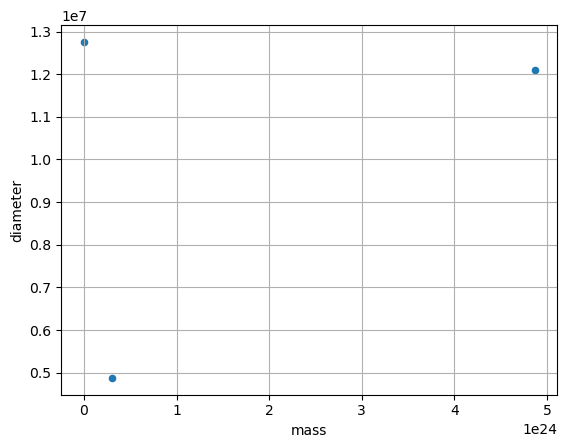

In [34]:
df.plot(kind='scatter', x='mass', y='diameter', grid=True)

<Axes: >

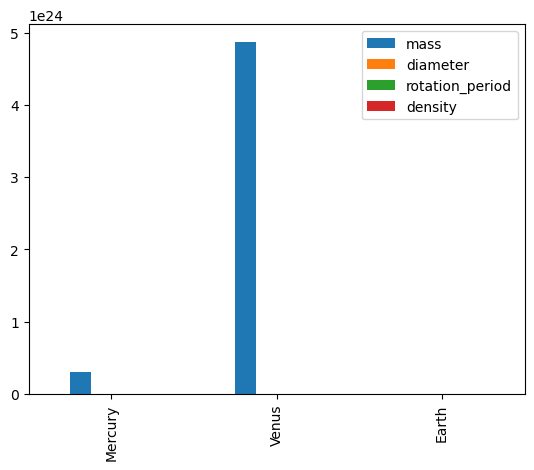

In [35]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

<Axes: >

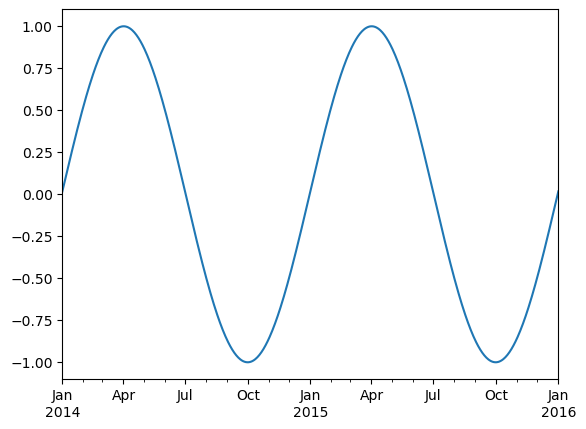

In [36]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python's slicing notation inside `.loc` to select a date range.

<Axes: >

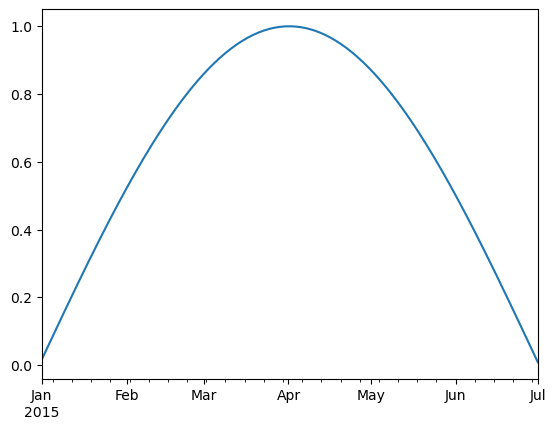

In [37]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

The TimeIndex object has lots of useful attributes

In [38]:
timeseries.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
      dtype='int32', length=731)

In [39]:
timeseries.index.day

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
      dtype='int32', length=731)

## Reading Data Files: Weather Station Data

In this example, we will use NOAA weather station data from https://www.ncdc.noaa.gov/data-access/land-based-station-data.

The details of files we are going to read are described in this [README file](ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/README.txt).

We now have a text file on our hard drive called `data.txt`. Examine it.

To read it into pandas, we will use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.

With no options, this is what we get.

In [ ]:
df = pd.read_csv(datafile)
df.head()

Pandas failed to identify the different columns. This is because it was expecting standard CSV (comma-separated values) file. In our file, instead, the values are separated by whitespace. And not a single whilespace--the amount of whitespace between values varies. We can tell pandas this using the `sep` keyword.

In [ ]:
df = pd.read_csv(datafile, sep='\s+')
df.head()

Great! It worked. 

If we look closely, we will see there are lots of -99 and -9999 values in the file. The [README file](ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/README.txt) tells us that these are values used to represent missing data. Let's tell this to pandas.

In [ ]:
df = pd.read_csv(datafile, sep='\s+', na_values=[-9999.0, -99.0])
df.head()

Great. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [ ]:
df.info()

One problem here is that pandas did not recognize the `LDT_DATE` column as a date. Let's help it.

In [ ]:
df = pd.read_csv(datafile, sep='\s+',
                 na_values=[-9999.0, -99.0],
                 parse_dates=[1])
df.info()

It worked! Finally, let's tell pandas to use the date column as the index.

In [ ]:
df = df.set_index('LST_DATE')
df.head()

We can now access values by time:

In [ ]:
df.loc['2017-08-07']

Or use slicing to get a range:

In [ ]:
df.loc['2017-07-01':'2017-07-31']

### Quick Statistics

In [ ]:
df.describe()

### Plotting Values

We can now quickly make plots of the data

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,14))

df.iloc[:, 4:8].boxplot(ax=ax[0,0])
df.iloc[:, 10:14].boxplot(ax=ax[0,1])
df.iloc[:, 14:17].boxplot(ax=ax[1,0])
df.iloc[:, 18:22].boxplot(ax=ax[1,1])


ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90);

Pandas is very "time aware":

In [ ]:
df.T_DAILY_MEAN.plot()

Note: we could also manually create an axis and plot into it.

In [ ]:
fig, ax = plt.subplots()
df.T_DAILY_MEAN.plot(ax=ax)
ax.set_title('Pandas Made This!')

In [ ]:
df[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

### Resampling

Since pandas understands time, we can use it to do resampling.

In [ ]:
# monthly reampler object
rs_obj = df.resample('MS')
rs_obj

In [ ]:
rs_obj.mean()

We can chain all of that together

In [ ]:
df_mm = df.resample('MS').mean()
df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

Next time we will dig deeper into resampling, rolling means, and grouping operations (groupby).